### Perceptron 
<b></b>
Perceptron is the first neural network model that can learn from data, invented in 1958 at the Cornell Aeronautical Laboratory by Frank Rosenblatt. 

* Linear classifier.
* Binary or bipolar data
\begin{equation}
  \hat y=
  \begin{cases}
    1, &  \sum_{i}^{m} w_i.x_i+b> 0  \\
    -1, & \text{otherwise}
  \end{cases}
\end{equation}

Or, we can write [for a single data vector= x, weight vector=w and bias=b]
\begin{equation}
  z=x.w+b\\
  \hat y=sign(z)
\end{equation}

Or, we can simplify,
\begin{equation}
  z=X.W^T\\
  \hat y=sign(z)
\end{equation}
where X=data (NxD), W=weight vector(1xD) , b=bias(1x1)

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
X=np.array([[8, 7], [4, 10], [9, 7], [7, 10], [9, 6], [4, 8], [10, 10], [2, 7], [8, 3], [7, 5], [4, 4],  [4, 6], [1, 3], [2, 5]])
y=np.array([1, 1, 1, 1, 1, 1, 1, -1, -1, -1, -1, -1, -1, -1])

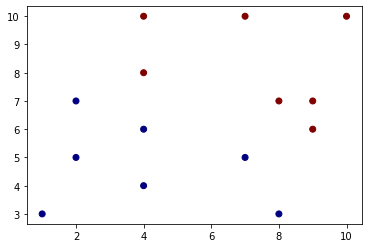

In [3]:
plt.scatter(X[:,0],X[:, 1],marker='o', c=y, cmap='jet')   
plt.show()

<b>First Task: calculate output and plot the data</b><br>
Given, w=[-2.0, 0.4, 0.1], calculate output $\hat y$ <br> <b>note:</b> w[0]=bias<br>
 
* Output should be, $\hat y=[1, 1, 1, 1, 1, 1, 1, -1, 1, 1, -1, 1, -1, -1]$
* Note: variable XX contains 1 in the first column and the rest is same as X. This will remove the necessity of useing seperate bias.

XX=np.c_[np.ones(X.shape[0]), X]  #add column with value 1 in the first column. to remove the need of separate bias
print(XX[:4])

In [5]:
y_head = []
w = np.array([-2.0, 0.4, 0.1])

for i in range(0,len(XX)):
    if( np.dot(XX[i],w) > 0):
        y_head.append(1)
    else:
        y_head.append(-1)

print(y_head)

[1, 1, 1, 1, 1, 1, 1, -1, 1, 1, 1, 1, -1, -1]


<b> Plotting the hyperplane</b>

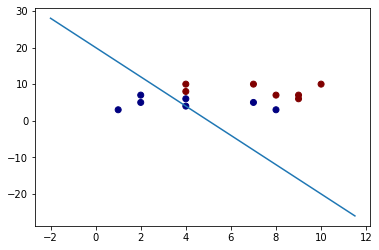

In [7]:
w=[-2.0, 0.4, 0.1]

nx=np.arange(-2,12,0.5)
#ax+by+c=0
ny=-(w[1]*nx+w[0])/w[2]

plt.scatter(X[:,0],X[:, 1],marker='o', c=y, cmap='jet')  
plt.plot(nx, ny )  
plt.show()

<b>Second Task: Update check</b>
Let's choose a missclassified data,  $rx=[1, 4,6], ry=-1$ <br>
Update rule: $w=w+ \eta(ry*rx)$  <br>
Where, learning rate $0> \eta \leq 1$ <br>
Let, $\eta=0.1$  <br>
* update w for the data. w should be [-2.1,  0. , -0.5]

In [8]:

Rx = np.array([1, 4, 6])
Ry = -1

L_rate = 0.1
# Update rule, w = w+(Rx*Ry)
w = w-(L_rate*Rx)   # Where Ry = -1

print(w)

[-2.1  0.  -0.5]


<b>Third Task: Train perceptron</b> <br>

* your task is to implement perceptron learning algorithm. Your implementation should correctly classify the data above. <br>
* Print the trained W <br>
* Plot the data and the decision boundary <br>
* Average Loss $loss=\frac{1}{N} \sum(y-\hat y)^2$
* Plot loss history.

In [9]:
x = np.array(XX)
Avg_los = []

In [10]:
def lin_reg(x, w):
    val = 0
    for i,j in zip(x, w):
        val+=i*j
    return val

In [11]:
def given_sign(val):
    return np.sign(val)

In [12]:
def predict(x, w):
    hypo = []
    for i in x:
        lin = lin_reg(i, w)
        hp = given_sign(lin)
        hypo.append(hp)
        #print(hypo)
    return hypo

In [13]:
def miss_class(py, y):
    miss = []
    los = 0
    for i in range(len(y)):
        los+=((y[i]-py[i])**2)
        if py[i] != y[i]:
            miss.append(i)
    Avg_los.append(los/len(y))
    #print(Avg_los)
    return miss

In [14]:
def perceptron(x, y):
    w = np.array([-2.0, 0.4, 0.1])
    # print(w)
    L_rate = 0.1
    py = predict(x, w)
    #print(py)
    miss = miss_class(py, y)
    #print(miss)
    
    while len(miss)>0:
        rnd=np.random.choice(miss)
        #print(rnd)
        
        Rx = x[rnd]
        #print(rx)
        
        Ry = y[rnd]
        #print(ry)
        
        w = w+L_rate*(Rx*Ry)
        #print(w)
        
        py = predict(x, w)
        #print(py)
        
        miss = miss_class(py, y)
        
    return w

In [15]:
w = perceptron(x, y)
print(w)

[-3.1  0.2  0.3]


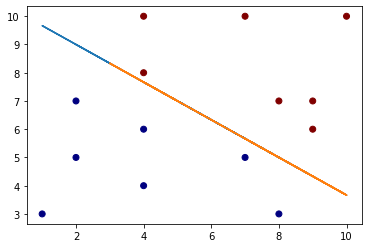

In [16]:
nx = np.array(X)
#ax+by+c=0
ny=-(w[1]*nx+w[0])/w[2]

plt.scatter(X[:,0],X[:, 1],marker='o', c=y, cmap='jet')  
plt.plot(nx, ny )  
plt.show()

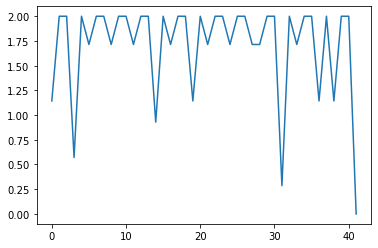

In [17]:
# Plot Avarage Loss

plt.plot(Avg_los)
plt.show()

<b>Fourth Task: Train a perceptron on Iris Data</b>
* First 100 data will be used.
* Only the first two features will be used for this task.

* Your implementation should correctly classify all the data.
* Plot the prediction, decision and loss history.

In [20]:
from sklearn import datasets

In [21]:
datas=datasets.load_iris()
X=datas['data'][:100]      #first two class only.
y=datas['target'][:100]
# print(X.shape, y.shape)

X=X[:,:2]  #first two column.
print('X:',X.shape, '  y:',y.shape)

#print(y)

X: (100, 2)   y: (100,)


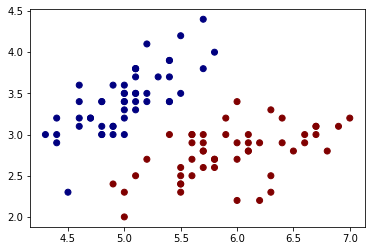

In [22]:
plt.scatter(X[:,0], X[:,1], c=y, cmap='jet') 
plt.show()

In [23]:
XX = np.c_[np.ones(X.shape[0]), X]
x = np.array(XX)
Avg_los = []

print(x.shape)

(100, 3)


In [24]:
def lin_reg(x, w):
    val = 0
    for i,j in zip(x, w):
        val+=i*j
    return val

In [25]:
def given_sign(val):
    return np.sign(val)

In [26]:
def predict(x, w):
    hypo = []
    for i in x:
        lin = lin_reg(i, w)
        hp = given_sign(lin)
        hypo.append(hp)
        #print(hypo)
    return hypo

In [27]:
def predict(x, w):
    hypo = []
    for i in x:
        lin = lin_reg(i, w)
        hp = given_sign(lin)
        hypo.append(hp)
        #print(hypo)
    return hypo

In [28]:
def miss_class(py, y):
    miss = []
    los = 0
    for i in range(len(y)):
        los+=((y[i]-py[i])**2)
        if py[i] != y[i]:
            miss.append(i)
    Avg_los.append(los/len(y))
    #print(Avg_los)
    return miss

In [29]:
def perceptron(x, y):
    w = np.random.rand(3)
    # print(w)
    L_rate = 0.1
    py = predict(x, w)
    #print(py)
    miss = miss_class(py, y)
    #print(miss)
    
    while len(miss) > 0:
        rnd=np.random.choice(miss)
        #print(rnd)
        
        Rx = x[rnd]
        #print(rx)
        
        Ry = y[rnd]
        #print(ry)
        
        w = w+L_rate*(Rx*Ry)
        #print(w)
        
        py = predict(x, w)
        #print(py)
        
        miss = miss_class(py, y)
        
    return w

In [30]:
for i in range(len(y)):
    if y[i] == 0:
        y[i] = -1  # Change level where y=0 to -1
        
w = perceptron(x, y)
print(w)

[-10.94657496   6.75582556  -8.51057726]


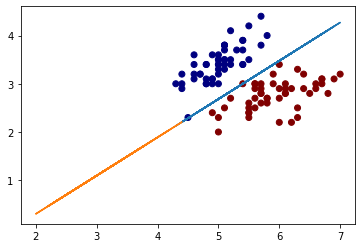

In [31]:
nx = np.array(X)
#ax+by+c=0
ny=-(w[1]*nx+w[0])/w[2]

plt.scatter(X[:,0],X[:, 1],marker='o', c=y, cmap='jet')
plt.plot(nx, ny )
plt.show()

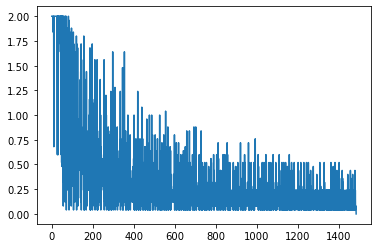

In [32]:
# Plot Avarage Loss

plt.plot(Avg_los)
plt.show()